# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

We didn't want to use it in the lectures, but believe that it would be very interesting for you to try it out (and maybe read about it on your own).

There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.


## Import the relevant libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import preprocessing

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [23]:
raw_data = pd.read_csv(r'C:\Users\user\Desktop\iris-dataset.csv')
raw_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

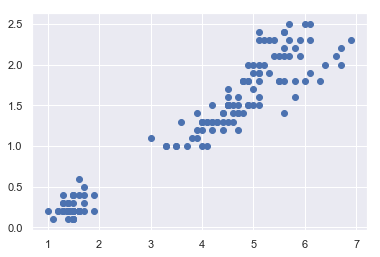

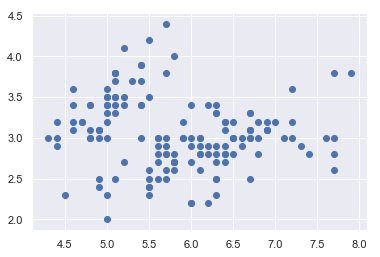

In [25]:
plt.scatter(raw_data['petal_length'], raw_data['petal_width'], cmap = 'rainbow')
plt.show()
plt.scatter(raw_data['sepal_length'], raw_data['sepal_width'], cmap = 'rainbow')
plt.show()

In [26]:
petal_data = raw_data[['petal_length', 'petal_width']].copy()
sepal_data = raw_data[['sepal_length', 'sepal_width']].copy()


# Clustering (unscaled data)

Separate the original data into 2 clusters.

In [36]:
KMp = KMeans(2)
KMs = KMeans(2)
c_p = KMp.fit(petal_data)
c_s = KMs.fit(sepal_data)

In [37]:
c_p_data = c_p.predict(petal_data)
c_s_data = c_s.predict(sepal_data)

In [38]:
petal_data['clustering'] = c_p_data
sepal_data['clustering'] = c_s_data

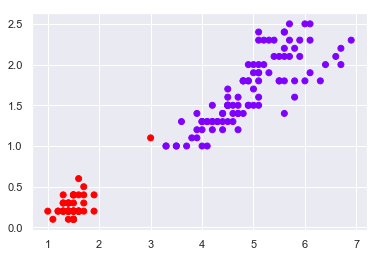

In [39]:
plt.scatter(petal_data['petal_length'], petal_data['petal_width'], c=petal_data['clustering'], cmap = 'rainbow')

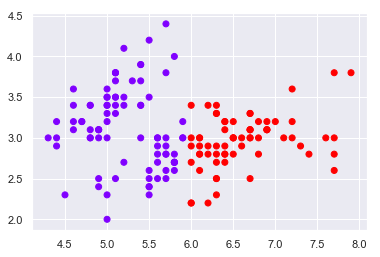

In [40]:
plt.scatter(sepal_data['sepal_length'], sepal_data['sepal_width'], c=sepal_data['clustering'], cmap = 'rainbow')

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. 

In [27]:
#prepare data set
s_petal_data = raw_data[['petal_length', 'petal_width']].copy()
s_sepal_data = raw_data[['sepal_length', 'sepal_width']].copy()

#scaling
sc_p_data = preprocessing.scale(s_petal_data)

sc_s_data = preprocessing.scale(s_sepal_data)


# Clustering (scaled data)

In [76]:
# creat model and fit
KM1 = KMeans(3)
KM2 = KMeans(3)
sc_p = KM1.fit(sc_p_data)

sc_s = KM2.fit(sc_s_data)

In [77]:
#pred data
sc_p_pred = sc_p.predict(sc_p_data)

sc_s_pred = sc_s.predict(sc_s_data)

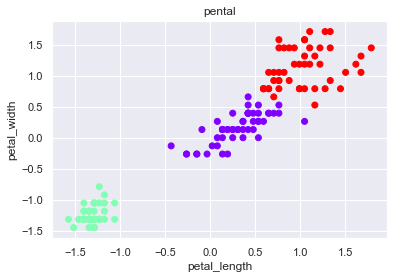

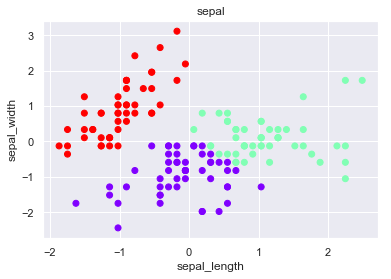

In [78]:
#visualization petal
plt.scatter(sc_p_data[:,0], sc_p_data[:,1], c=sc_p_pred, cmap = 'rainbow')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('pental')
plt.show()
#visualization sepal
plt.scatter(sc_s_data[:,0], sc_s_data[:,1], c=sc_s_pred, cmap = 'rainbow')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('sepal')
plt.show()

## Take Advantage of the Elbow Method

### WCSS

In [44]:
WCSS_P = []
for i in range(1,10):
    KM1_p = KMeans(i)
    KM1_p.fit(sc_p_data)
    wcss_irer_p = KM1_p.inertia_
    WCSS_P.append(wcss_irer_p)
    
WCSS_S = []
for i in range(1,10):
    KM2_s = KMeans(i)
    KM2_s.fit(sc_s_data)
    wcss_irer_s = KM2_s.inertia_
    WCSS_S.append(wcss_irer_s)
    

### The Elbow Method

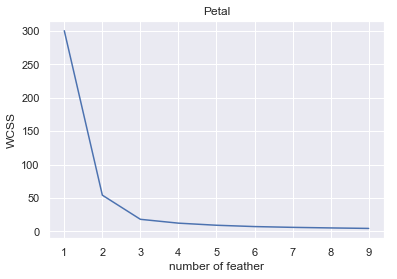

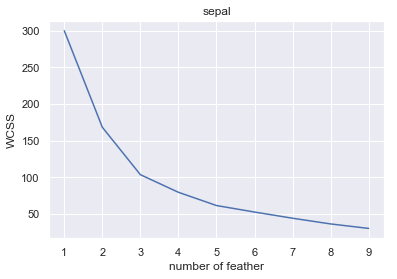

In [64]:
plt.plot(range(1,10),WCSS_P)
plt.xlabel('number of feather')
plt.ylabel('WCSS')
plt.title('Petal')
plt.show()

plt.plot(range(1,10),WCSS_S)
plt.xlabel('number of feather')
plt.ylabel('WCSS')
plt.title('sepal')
plt.show()

How many clusters are there?

In [71]:
WCSS_P

[300.0,
 54.145847013449895,
 18.046983891906272,
 12.307440251261847,
 9.175315740007754,
 7.197519464116911,
 6.026593155951447,
 5.170633181510533,
 4.436645442863783]

In [72]:
WCSS_S

[300.0,
 168.39262198361087,
 103.7844389526574,
 79.7903378046299,
 61.730827145295294,
 52.85965140699233,
 44.43064622389222,
 36.64135486902714,
 30.53935939864178]

## ANSWER

In [89]:
raw_ans_data = pd.read_csv(r'C:\Users\user\Desktop\iris-with-answers.csv')
raw_ans_data.head()
raw_ans_data['species'] = raw_ans_data['species'].map({'setosa':1, 'versicolor':2, 'virginica':3})

In [90]:
raw_ans_data['species'].unique()

array([1, 2, 3], dtype=int64)

In [91]:
ans_petal_data = raw_ans_data[['petal_length', 'petal_width', 'species']].copy()
ans_sepal_data = raw_ans_data[['sepal_length', 'sepal_width', 'species']].copy()


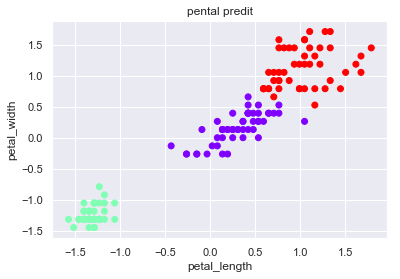

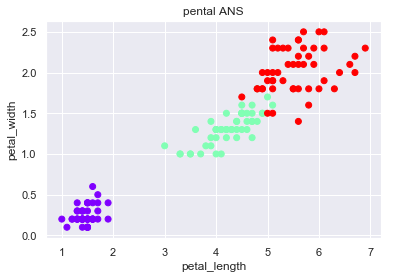

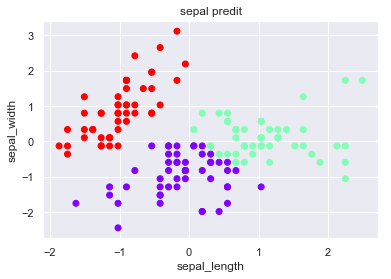

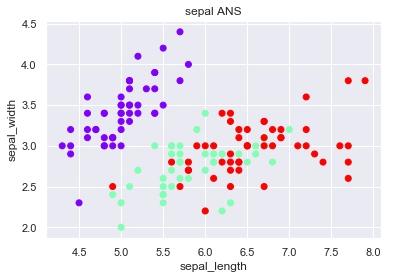

In [94]:
#visualization petal predit
plt.scatter(sc_p_data[:,0], sc_p_data[:,1], c=sc_p_pred, cmap = 'rainbow')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('pental predit')
plt.show()
#visualization petal ans
plt.scatter(raw_ans_data['petal_length'], raw_ans_data['petal_width'], c=raw_ans_data['species'], cmap = 'rainbow')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('pental ANS')
plt.show()




#visualization sepal predit
plt.scatter(sc_s_data[:,0], sc_s_data[:,1], c=sc_s_pred, cmap = 'rainbow')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('sepal predit')
plt.show()
#visualization sepal
plt.scatter(raw_ans_data['sepal_length'], raw_ans_data['sepal_width'], c=raw_ans_data['species'], cmap = 'rainbow')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('sepal ANS')
plt.show()